# Importações de modulos necessários

In [2]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler


# Aquisição dos dados

In [3]:
country_df = pd.read_csv('data/Country-data.csv')

In [4]:
country_df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [ ]:
sns.pairplot(country_df)

In [8]:
pda_df = pd.DataFrame(PCA().fit_transform(country_df.drop('country', axis='columns')))
pda_df.head()

,0,1,2,3,4,5,6,7,8
0,-19815.128018,-1651.124720,38.424930,-0.192311,-13.395274,6.528804,3.309936,-0.155323,-1.222781
1,-11338.938992,1493.469028,-28.182163,-14.070214,-7.859092,2.858821,-3.265009,-0.796140,0.650387
2,-8926.352589,3264.684102,-11.916113,-16.804181,12.238446,0.164026,-4.067036,-1.034689,-0.126227
3,-14652.465937,-867.795270,59.558400,40.492538,24.138701,-6.150069,-3.502401,-0.735712,-0.576152
4,896.142032,1898.478151,-29.133957,0.507663,-7.630103,0.394944,-1.972822,-1.296089,-0.104073


In [13]:
px.scatter_3d(data_frame=pda_df, x=0, y=1, z=2)

# Análise exploratória

<AxesSubplot:>

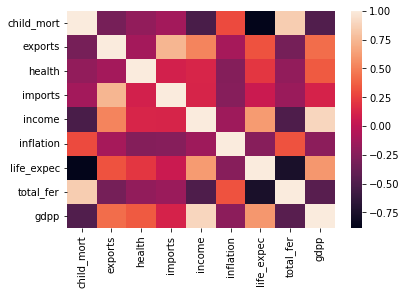

In [6]:
sns.heatmap(country_df.corr())

# Preparação dos dados

In [5]:
country_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


* Uma prática comum para a criação de um modelo de aprendizado de máquina é normalizar os dados para que as faixas dos dados sejam padronizadas, o quê ajuda o algoritmo de aprendizado a convergir para um solução

### Minmax scaler
Será utilizado o minmax scaler que normaliza os dados de forma que converta o espaço para uma faixa entre 0 e 1

In [10]:
scaler = MinMaxScaler()
normalized_iris_df = pd.DataFrame(data=scaler.fit_transform(iris_df), columns=[x[:x.find('(cm)')] for x in iris_df.columns])
normalized_iris_df.head()

,sepal length,sepal width,petal length,petal width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667


# Criação do modelo de aprendizado

## Procurando o K ideal

* Para encontrar o k ideal utilizaremos o método do cotovoleo, que encontra um número de cluster a partir de onde os dados deixam de apresentar uma redução significativa da variância dentro de cada cluster

([<matplotlib.axis.XTick at 0x285037e50>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

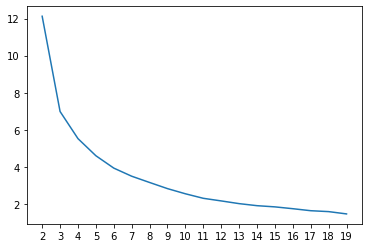

In [14]:
variance_intra_cluster = []

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(normalized_iris_df)
    variance_intra_cluster.append(kmeans.inertia_)

sns.lineplot(x=list(range(2, 20)), y=variance_intra_cluster)
plt.xticks(list(range(2, 20)))

In [27]:
final_df = iris_df.copy()
kmeans = KMeans(n_clusters=8)
final_df['cluster'] = kmeans.fit_predict(normalized_iris_df)

# Avaliação do modelo

In [28]:
final_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),cluster
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,7
2,4.7,3.2,1.3,0.2,7
3,4.6,3.1,1.5,0.2,7
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

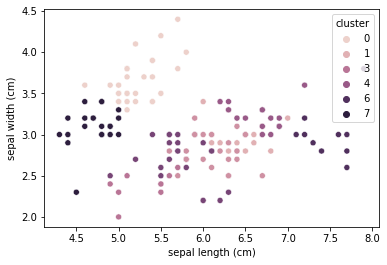

In [29]:
sns.scatterplot(data=final_df, x='sepal length (cm)', y='sepal width (cm)', hue='cluster')

## Utilização do pca

In [30]:
pca = PCA()
pca_df = pca.fit_transform(final_df.drop('cluster', axis='columns'))
pca_df = pd.DataFrame(pca_df)

In [31]:
pca_df.head()

,0,1,2,3
0,-2.684126,0.319397,-0.027915,-0.002262
1,-2.714142,-0.177001,-0.210464,-0.099027
2,-2.888991,-0.144949,0.017900,-0.019968
3,-2.745343,-0.318299,0.031559,0.075576
4,-2.728717,0.326755,0.090079,0.061259


In [32]:
px.scatter_3d(data_frame=pca_df, x=0, y=1, z=2, color=final_df['cluster'])